In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.listdir("./inputData")

['bci_data_sp1s_aa_bbci.7z',
 'desc.md',
 'sp1s_aa_test.csv',
 'sp1s_aa_test.txt',
 'sp1s_aa_test_1000Hz.csv',
 'sp1s_aa_test_1000Hz.txt',
 'sp1s_aa_train.csv',
 'sp1s_aa_train.txt',
 'sp1s_aa_train_1000Hz.csv',
 'sp1s_aa_train_1000Hz.txt']

In [2]:
train_df = pd.read_csv("./inputData/sp1s_aa_train.csv", dtype="float", delim_whitespace=True, header=None)
train_df.info()
print(train_df.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Columns: 1401 entries, 0 to 1400
dtypes: float64(1401)
memory usage: 3.4 MB
False


In [3]:
targets = train_df[0]
train_df.drop(columns=[0], inplace=True)

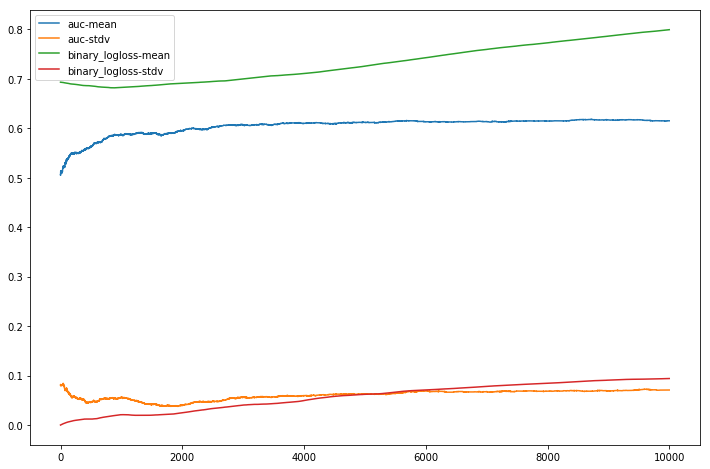

In [4]:
import lightgbm as lgb

params = dict(learning_rate=.001, n_jobs=3,
              objective="binary",
              reg_alpha=0.1, reg_lambda=1.1,
              num_leaves=71, max_depth=7,
              metrics=["auc", "binary_logloss"])

lgb_dataset = lgb.Dataset(data=train_df, label=targets)

eval_hist = lgb.cv(params, train_set=lgb_dataset, num_boost_round=10000)
hist_df = pd.DataFrame(eval_hist)
hist_df.plot(figsize=(12, 8))
plt.show()